In [3]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#constants
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [5]:
#loading dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory("PlantVillage",shuffle = True,image_size = (IMAGE_SIZE,IMAGE_SIZE),batch_size = BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [6]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
len(dataset)

68

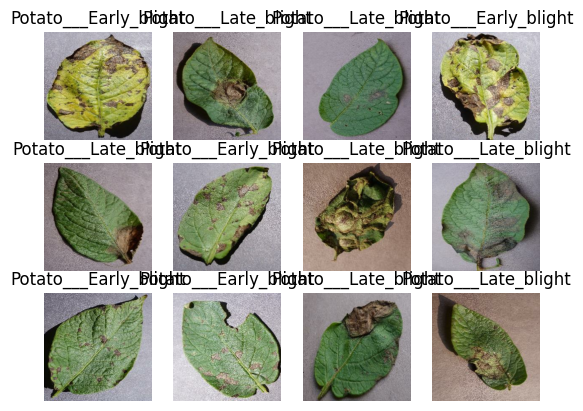

In [8]:
#rgb constraints 0=early,1=late,2=healthy
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    #print(image_batch[0].shape)
   # print(label_batch.numpy())

In [9]:
#80-20 split
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_df(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed = 12)
        train_size = int(train_split*ds_size)
        val_size = int(val_split*ds_size)
        train_ds = ds.take(train_size)
        val_ds = ds.skip(train_size).take(val_size)
        test_ds = ds.skip(train_size).skip(val_size)
        return train_ds,val_ds,test_ds

In [16]:
train_ds,val_ds,test_ds  = get_dataset_partitions_df(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8

In [22]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [23]:
#preprocessing , you divide the number by 255 so that you can get it between 0 and 1.
resize_and_rescale = tf.keras.Sequential([layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),layers.experimental.preprocessing.Rescaling(1.0/255)])

In [24]:
#data augumentation layer
data_augumentation = tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),layers.experimental.preprocessing.RandomRotation(0.2),])

In [25]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3

model = models.Sequential([resize_and_rescale,data_augumentation,layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),layers.MaxPooling2D((2,2)),layers.Conv2D(64,kernel_size=(3,3),activation='relu'),layers.MaxPooling2D((2,2)),layers.Conv2D(64,kernel_size=(3,3),activation='relu'),layers.MaxPooling2D((2,2)),layers.Conv2D(64,(3,3),activation='relu'),layers.MaxPooling2D((2,2)),layers.Conv2D(64,(3,3),activation='relu'),layers.MaxPooling2D((2,2)),layers.Conv2D(64,(3,3),activation='relu'),layers.MaxPooling2D((2,2)),layers.Flatten(),layers.Dense(64,activation='relu'),layers.Dense(n_classes,activation='softmax'),])
model.build(input_shape=input_shape)

In [26]:
#neural network architecture,deep learning first step
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [27]:
#second step is compilation
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [29]:
history = model.fit(train_ds,epochs=EPOCHS,batch_size=BATCH_SIZE,verbose=1,validation_data=val_ds)

Epoch 1/50
54/54 [==============================] - 323s 6s/step - loss: 0.9272 - accuracy: 0.4537 - val_loss: 0.8662 - val_accuracy: 0.4792
Epoch 2/50
54/54 [==============================] - 303s 5s/step - loss: 0.7824 - accuracy: 0.6001 - val_loss: 0.7572 - val_accuracy: 0.5833
Epoch 3/50
54/54 [==============================] - 225s 4s/step - loss: 0.5351 - accuracy: 0.7431 - val_loss: 0.5971 - val_accuracy: 0.7031
Epoch 4/50
54/54 [==============================] - 197s 4s/step - loss: 0.3960 - accuracy: 0.8258 - val_loss: 0.3286 - val_accuracy: 0.8698
Epoch 5/50
54/54 [==============================] - 243s 5s/step - loss: 0.3155 - accuracy: 0.8767 - val_loss: 0.3038 - val_accuracy: 0.8698
Epoch 6/50
54/54 [==============================] - 198s 4s/step - loss: 0.2255 - accuracy: 0.9057 - val_loss: 0.2545 - val_accuracy: 0.8854
Epoch 7/50
54/54 [==============================] - 209s 4s/step - loss: 0.2308 - accuracy: 0.9091 - val_loss: 0.2482 - val_accuracy: 0.8906
Epoch 8/50
54

In [28]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 14s 1s/step - loss: 1.0945 - accuracy: 0.4609


In [29]:
scores

[1.094451665878296, 0.4609375]

In [ ]:
#continue reading from second module
#take one step at a time